# Investigaion of Dataset (TMDB MOVIES)

![TMDB](https://user-images.githubusercontent.com/32237416/82473309-fb731400-9ae6-11ea-8908-146989481ba2.png)

## Table of Contents


1. Introduction<br>
2. Data Wrangling<br>
3. Exploratory Data Analysis<br>
4. Data Visualisation<br>
5. Conclusion<br>
6. Resources<br>


# Introdution
>This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.   


## Question probed from perceiving the dataset.

> 1. Which films have earned high and low profits?
> 2. Which films have earned high and low revenue?
> 3. Which films have a high and low budget?
> 4. Which films have a high and low runtime?
>--------------------------------------------------------
> # Data Visualisation Questions
>--------------------------------------------------------
> 1. What is the budget over the Years? 
> 2. What is the revenue over the Years?
> 3. What are the profits over the Years?
> 4. what was the runtime over the Years?
> # Profits above 50 Million Dollars.
>--------------------------------------------------------
> 1. What are the successful genres concerning profitable films?
> 2. which is the most frequent cast concerning profitable films?
> 3. What is the average budget for profitable films?
> 4. What is the average revenue of profitable films?
> 5. What is the average duration of the movie for profitable films?


# Data Wrangling

>To Achive question probed above further data wrangling is needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>Let's have look at shape of the dataframe before cleaning

In [4]:
row,col = df.shape
print('There are {} total entries of movies and {} columns'.format(row-1,col))

There are 10865 total entries of movies and 21 columns


> Drop the outcast columns

In [5]:
df.drop(['id',
         'imdb_id','popularity',
         'homepage','director','overview',
         'tagline','keywords','budget_adj','production_companies','revenue_adj'],axis=1,inplace=True)

> Add profits column

In [6]:
df['Profits'] = df.revenue-df.budget

> Replace the special character ' | ' with ' , ' 

In [7]:
def sep(column):
    df[column] = df[column].str.replace('|',',')
sep('cast')
sep('genres')

> Drop the missing values

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

0

> Replace the zero with NAN

In [9]:
df['revenue'] = df['revenue'].replace(0,np.NAN)
df['budget'] = df['budget'].replace(0,np.NAN)
df['runtime'] = df['runtime'].replace(0, np.NAN)

> Check how many Non null values are there

In [10]:
df.isna().sum()

budget            5696
revenue           6016
original_title       0
cast                76
runtime             31
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
Profits              0
dtype: int64

> Drop Non null values

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          3850 non-null   float64
 1   revenue         3850 non-null   float64
 2   original_title  3850 non-null   object 
 3   cast            3850 non-null   object 
 4   runtime         3850 non-null   float64
 5   genres          3850 non-null   object 
 6   release_date    3850 non-null   object 
 7   vote_count      3850 non-null   int64  
 8   vote_average    3850 non-null   float64
 9   release_year    3850 non-null   int64  
 10  Profits         3850 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 360.9+ KB


> Rename necessary columns

In [13]:
df = df.rename(columns={'budget':'Budget',
                        'revenue':'Revenue',
                        'original_title':'Title',
                        'cast':'Cast',
                        'runtime':'Runtime',
                        'genres':'Genres',
                        'vote_count':'Movie Ratings',
                        'vote_average':'Rating Average',
                        'release_year':'Year'})

In [14]:
row,col = df.shape
print('There are {} total entries of movies and {} columns'.format(row-1,col))

There are 3849 total entries of movies and 11 columns


In [15]:
df.head(3)

,Budget,Revenue,Title,Cast,Runtime,Genres,release_date,Movie Ratings,Rating Average,Year,Profits
0,150000000.0,1.513529e+09,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",124.0,"Action,Adventure,Science Fiction,Thriller",6/9/15,5562,6.5,2015,1363528810
1,150000000.0,3.784364e+08,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",120.0,"Action,Adventure,Science Fiction,Thriller",5/13/15,6185,7.1,2015,228436354
2,110000000.0,2.952382e+08,Insurgent,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",119.0,"Adventure,Science Fiction,Thriller",3/18/15,2480,6.3,2015,185238201


# Exploratory Data Analysis  

> Create a funtion to get the insight of high and low movie budget,revenue, profits, etc...
>

In [16]:
def comap(column):
    hf = df[column].idxmax()
    hf = pd.DataFrame(df.loc[hf])
    hf = hf.transpose()
    hf = hf.reset_index().rename(index={0:'High'})
    hf = hf.drop('index',axis=1)
    
    lf = df[column].idxmin()
    lf = pd.DataFrame(df.loc[lf])
    lf = lf.transpose()
    lf = lf.reset_index().rename(index={0:'Low'})
    lf = lf.drop('index',axis=1)
    com = pd.concat([hf,lf])
    return com
def extract_df(column):
    pf = comap(column)
    high = pf.iloc[0][2:3]
    low =  pf.iloc[1][2:3]
    return (high[-1],low[-1])

> __Movies with high and low budgets .__

In [17]:
budget = extract_df('Budget')
print('{} has a high budget '.format(budget[0]))
print('{} has a low budget '.format(budget[1]))

The Warrior's Way has a high budget 
Lost & Found has a low budget 


In [18]:
df['Budget'].max()

425000000.0

In [19]:
df['Budget'].min()

1.0

>The Warrior's Way has a high budget of $425$ million dollars whereas, Mr. Holmes has a low budget of 1 million dollar according the data set.

>  __Movies Which earned immense and less revenue.__ 

In [20]:
revenue = extract_df('Revenue')
print('{} has an immense revenue'.format(revenue[0]))
print('{} has less revenue'.format(revenue[1]))

Avatar has an immense revenue
Shattered Glass has less revenue


In [21]:
df['Revenue'].max()

2781505847.0

In [22]:
df['Revenue'].min()

2.0

>Avatar has an immense revenue of $2.79$ billion dollars whereas, Shattered glass has less revenue of $2$ million dollars.

> __Movies Which earned immense and less profits.__

In [23]:
profit = extract_df('Profits')
print('{} has an immense profits.'.format(profit[0]))
print('{} has less profits.'.format(profit[1]))

Avatar has an immense profits.
The Warrior's Way has less profits.


In [24]:
df['Profits'].max()

2544505847

In [25]:
df['Profits'].min()

-413912431

>Avatar has an immense revenue of $2.55$ billion dollars whereas, Shattered glass has less revenue of $413$ million dollars.

> __Movies with high and low runtime.__

In [26]:
runtime = extract_df('Runtime')
print('{} has a high runtime.'.format(runtime[0]))
print('{} has a least runtime.'.format(runtime[1]))

Carlos has a high runtime.
Kid's Story has a least runtime.


>According to the Carlos has a high runtime however the film has three parts
where Part 1 is 98 min followed Part 2 (106 mins), Part3 (115 mins) whereas, 
kid's Story is 15 mins animated series.

> __Movies with high and least rated by viewers.__

In [27]:
rating1 = extract_df('Rating Average')
print('{} has a high Movie Rating.'.format(rating1[0]))
print('{} has a least Movie Ratung.'.format(rating1[1]))

The Shawshank Redemption has a high Movie Rating.
Foodfight! has a least Movie Ratung.


In [28]:
df['Rating Average'].max()

8.4

In [29]:
df['Rating Average'].min()

2.2

> The Shawshank Redemption has high rated whereas, Foodfight !
has the least rated by viewers.

# Data Visualisation

> Let's create a function to get insight on budget, profit, revenue, & runtime

In [30]:
def sume(x,y,title,x_axis,y_axis):
    ask = input('Enter "m" for mean "s" for sum of dataframe :').lower()
    if ask == 'm':
        mean = df.groupby(x)[y].mean()
        mean.plot(kind='line',figsize=(15,7),
           color='#00539CFF',
           marker='o',
           markersize=2,
           markerfacecolor='#FFD662FF',
           linewidth=3)
        plt.title('{}'.format(title),fontsize=20)
        plt.xlabel('{}'.format(x_axis),fontsize=17)
        plt.ylabel('{}'.format(y_axis),fontsize=18)
        plt.show()
   
    elif ask == 's':
        suma = df.groupby(x)[y].sum()
        suma.plot(kind='line')
        suma.plot(kind='line',figsize=(15,7),
           color='#101820FF',
           marker='o',
           markersize=2,
           markerfacecolor='#FFD662FF',
           linewidth=3)
        plt.title('{}'.format(title),fontsize=20)
        plt.xlabel('{}'.format(x_axis),fontsize=17)
        plt.ylabel('{}'.format(y_axis),fontsize=18)
        plt.show()
    else:
        return 'Try Again'

> **Budget over the Years**

Enter "m" for mean "s" for sum of dataframe :m


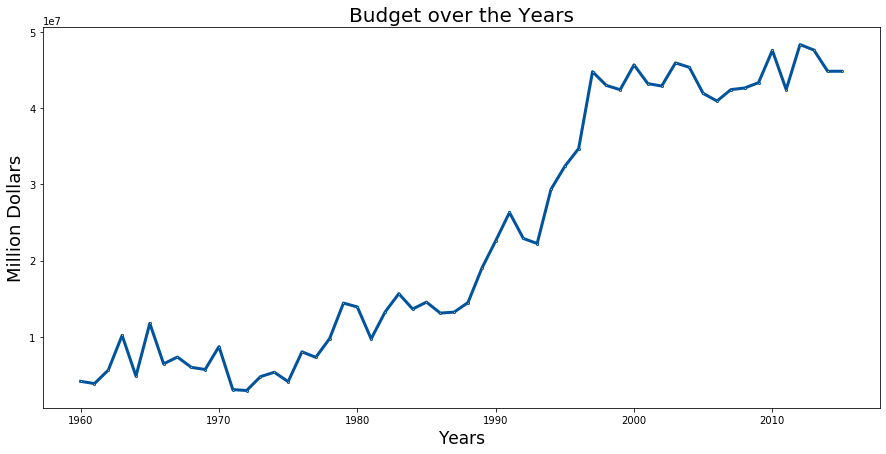

In [31]:
sume('Year','Budget','Budget over the Years','Years','Million Dollars')

>According to the graph, there is a continuing rise in producing films from 1960 to 2015. There is a slight oscillation during crisis between 2008 and 2009 in producing films even though films like avatar took a risk and succeed.

> **Revenue over the Years**

Enter "m" for mean "s" for sum of dataframe :m


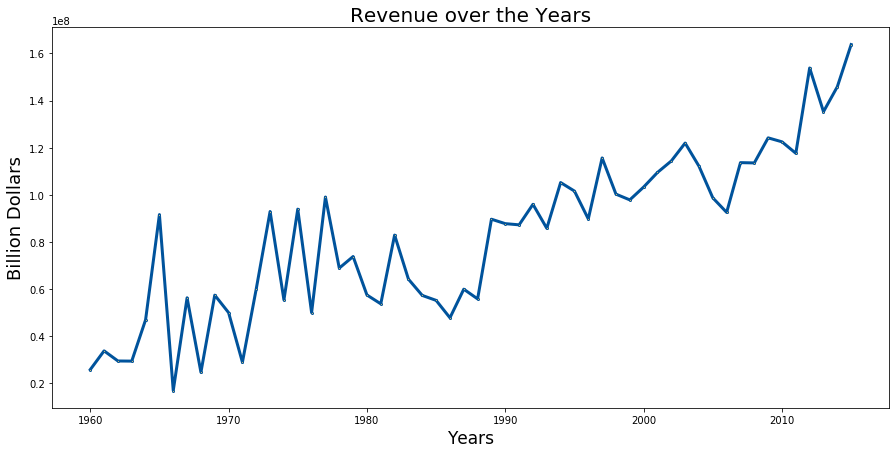

In [32]:
sume('Year','Revenue','Revenue over the Years','Years','Billion Dollars')

>According to the graph, nobody can predict that film which is released is going to succeed or flop. as a result, we can see wavings in the graph,
the revenue of the film stock depends on the situation.

> **Profits over the Years**

Enter "m" for mean "s" for sum of dataframe :s


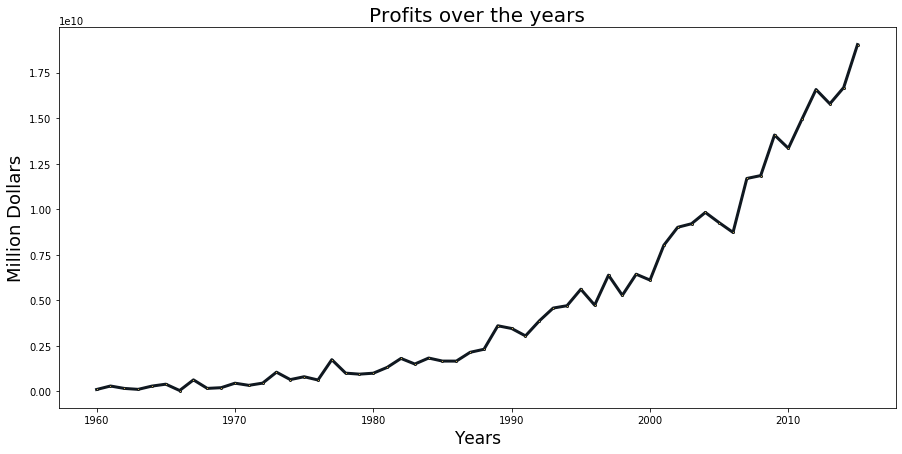

In [33]:
sume('Year','Profits','Profits over the years','Years','Million Dollars')

>By scrutinizing the graph, there is a continuous rise in profits over the years, as people are getting more entertainment by seeing films.
Films like Avatar, Titanic has tremendous profits over the years.

> **Runtime over the Years**

Enter "m" for mean "s" for sum of dataframe :m


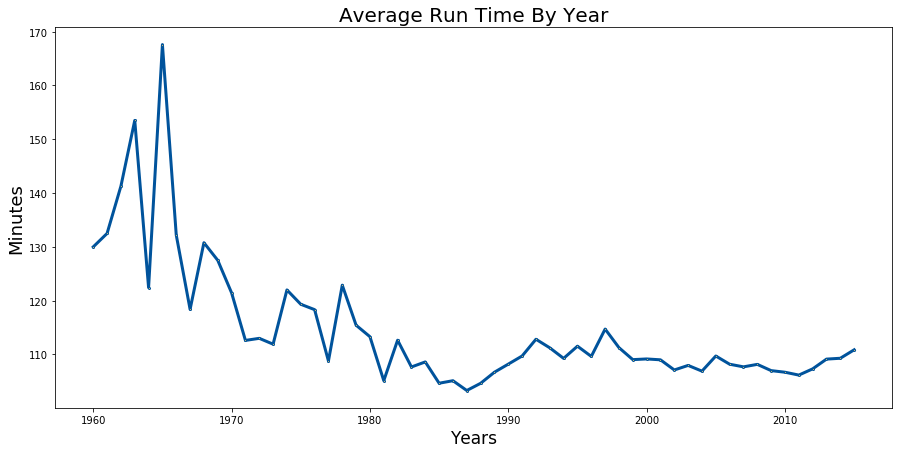

In [34]:
sume('Year','Runtime','Average Run Time By Year','Years','Minutes')

>By scrutinizing the graph, there is a continuous shrinkage over the years, let's have a clear insight into another plot.

> __Lets analyse more about runtime of the movie using different kind of plot i.e Box Plot and Histogram__

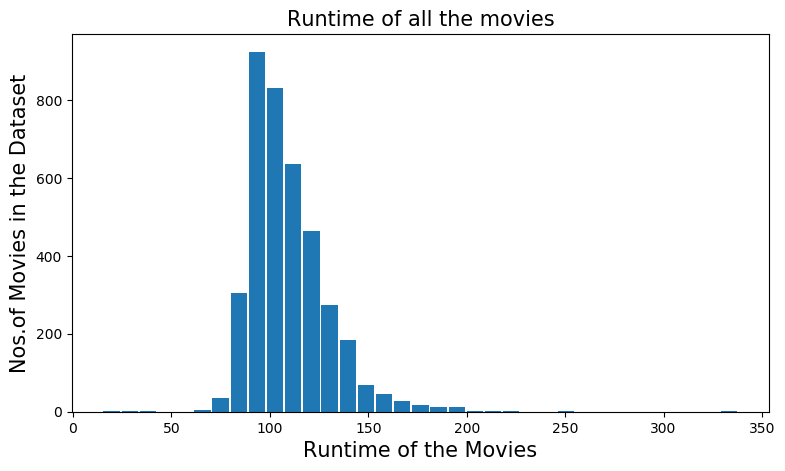

In [35]:
#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plo
plt.hist(df['Runtime'],rwidth = 0.9,bins =35)
#displays the plot
plt.show()

> The distribution of the above formed graph is positively skewed or right skewed! Most of the movies are timed between 80 to 115 minutes. Almost 1000 and more no.of movies fall in this criteria.

In [36]:
df['Runtime'].describe()

count    3850.000000
mean      109.228831
std        19.924053
min        15.000000
25%        95.250000
50%       106.000000
75%       119.000000
max       338.000000
Name: Runtime, dtype: float64

By scrutinizing at both the plot and calculations, we can conclude that..
>
> 1. 25% of movies have a runtime of less than 95 minutes
> 2. 50% of movies have a runtime of less than 109 minutes.
> 3. 75% of movies have a runtime of less than 119 minutes

># __Profits above 50 Million Dollars__

In [37]:
df = df.query('Profits >= 50000000')

In [38]:
def data(column):
    #will take a column, and separate the string by '|'
    data = df[column].str.cat(sep = ',')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split(','))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [39]:
c = data('Genres')

In [40]:
c.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

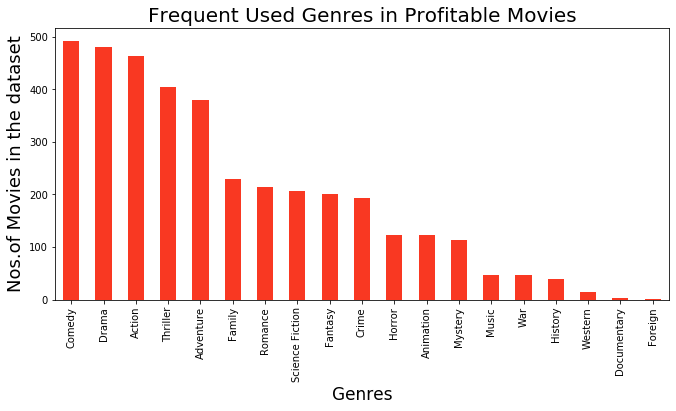

In [41]:
c.plot(kind='bar',figsize=(11,5),color='#F93822FF')
plt.title('Frequent Used Genres in Profitable Movies',fontsize=20)
plt.xlabel('Genres',fontsize=17)
plt.ylabel('Nos.of Movies in the dataset',fontsize=18)
plt.show()

> The films  which get huge profits are of either comedy or drama, action, thriller, adventure etc..

In [42]:
a = data('Cast')

In [43]:
a.head(5)

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

> As expecteted Tom Cruise is on the top with total 27 cast followed by Brad Pitt with 25 and Tom Hanks with 22.

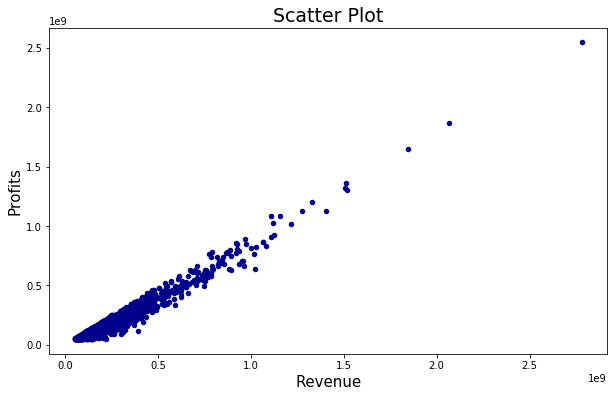

In [44]:
df.plot(kind='scatter', x='Revenue', y='Profits', figsize=(10, 6), color='darkblue')

plt.title('Scatter Plot',fontsize=19)
plt.xlabel('Revenue',fontsize=15)
plt.ylabel('Profits',fontsize=15)

plt.show()

> The movies having profit of 50 million dollar shows a positive coleation.

> __Let's create a function to get average of movies having profit of 50 million dollars.__

In [45]:
def find(column):
    mean = df[column].mean()
    return mean

In [46]:
find('Budget')

60444957.76083707

>The movies having profit of 50 million dollar and more have an average budget of 60 million dollar.

In [47]:
find('Revenue')

254957662.59491777

> The movies having profit of 50 million dollar and more have an average revenue of 255 million dollar.

In [48]:
find('Runtime')

113.66741405082212

> The movies having profit of 50 million dollar and more have an average duration of 113 minutes.

# Conclusion

By scrutinizing the data, for a movie to be in successful criteria.
Average Budget must be around 60 million dollar, The average duration of the movie must be 113 minutes, Any one of these should be in the cast: Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone, Cameron Diaz, Genre must be Action, Adventure, Thriller, Comedy, Drama.
This analysis was done considering the movies which had a significant amount of profit of around 50 million dollars. This might not completely error-free but by following this suggestion one can increase the probability of a movie becoming a hit. Moreover, we are not sure if the data provided to us is completely correct and up-to-date. As mentioned before the budget and revenue column do not have a currency unit, it might be possible different movies have a budget in the different currency according to the country they are produced in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis.

# Resources
> - Github
> - Wikipedia
> - imdb